In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# Esercitazione 4 _ Bonato Angela

L'esercitazione consisteva nell'effettuare simulazioni di dinamica molecolare Monte Carlo su un sistema di $N_p=108$ particelle mantenute a volume ed energia totale costanti (ensemble microcanonico). Per evolvere il sistema è stato utilizzato l'algoritmo di Verlet, mentre l'interazione è stata modellizzata secondo il potenziale di Lennard-Jones.

Innanzitutto ho completato il codice fornito aggiungendo il caclolo della pressione del sistema, calcolata mediante il teorema del viriale. Poi ho utilizzato il programma per simulare il sistema in tre diverse condizioni, corrispondenti ai tre stati di aggregazione (solido, liquido, gassoso) per un sistema di atomi di Argon. Perchè i risultati delle simulazioni assumessero carattere più generale, però, li ho sempre espressi utilizzando unità ridotte di Lennard-Jones, identificate dall'uso dell'apice $^*$. 

Per ogni stato di aggregazione considerato, il sistema è stato inizializzato nella configurazione di un cristallo FCC. Di conseguenza, prima di iniziare ogni simulazione, ho effettuato una fase di equilibrazione per portare il sistema nella condizione desiderata. In seguito ho eseguito misure di temperatura $T$, pressione $P$, energia potenziale $E_\mathrm{pot}$, energia cinetica $E_\mathrm{cin}$ ed energia totale $E_\mathrm{tot}$. Queste ultime tre grandezze sono state normalizzate sul numero di particelle $n$. 

## Stato solido 

Le condizioni in cui simulare il sistema erano densità $\rho^*=1.1$, temperatura $T^*=0.8$ e raggio di cutoff $r_c=2.2$. 

Per prima cosa mi sono occupata dell'equilibrazione, condotta monitorando la temperatura ad ogni passo dell'algoritmo. Ho inizialmente impostato una temperatura maggiore rispetto a quella richiesta, aspettandomi un brusco calo iniziale, e ho poi lasciato evolvere il sistema fino a farlo stabilizzare attorno al valore di target. Ho salvato la posizione e la velocità di ogni particella a questo punto e da qua sono partita con la simulazione vera e propria durante la quale ho eseguito le misure richieste.

Il calo di temperatura nei primi passi dell'algoritmo corrisponde ad una diminuzione di energia cinetica nel sistema, dunque ad un aumento di quella potenziale (nell'ensemble microcanonico l'energia totale è mantenuta sempre costante). Questo comportamento può essere spiegato dal fatto che preparando il sistema in una configurazione cristallina corrispondente ad un minimo dell'energia potenziale, quando inizia la fase di "scioglimento" necessaria a raggiungere la condizione desiderata l'energia potenziale esce dal minimo e inizia a crescere. Alla fine di questa decrescita, $T$ si trova ben sotto il valore su cui si stabilizza in seguito; si nota quindi una brusca crescita prima delle piccole oscillazioni attorno al valore considerato di equilibrio. Ciò è probabilmente da imputarsi al fatto che lo stato solido è caratterizzato da una configurazione ordinata che corrisponde ad un'energia potenziale minore di quella raggiunta dopo il calo.

I grafici qui riportati mostrano l'andamento della temperatura misurato ad ogni step nella fase di equilibrazione e poi durante la simulazione di misura, per dar conto dell'efficacia dell'equilibrazione effettuata.

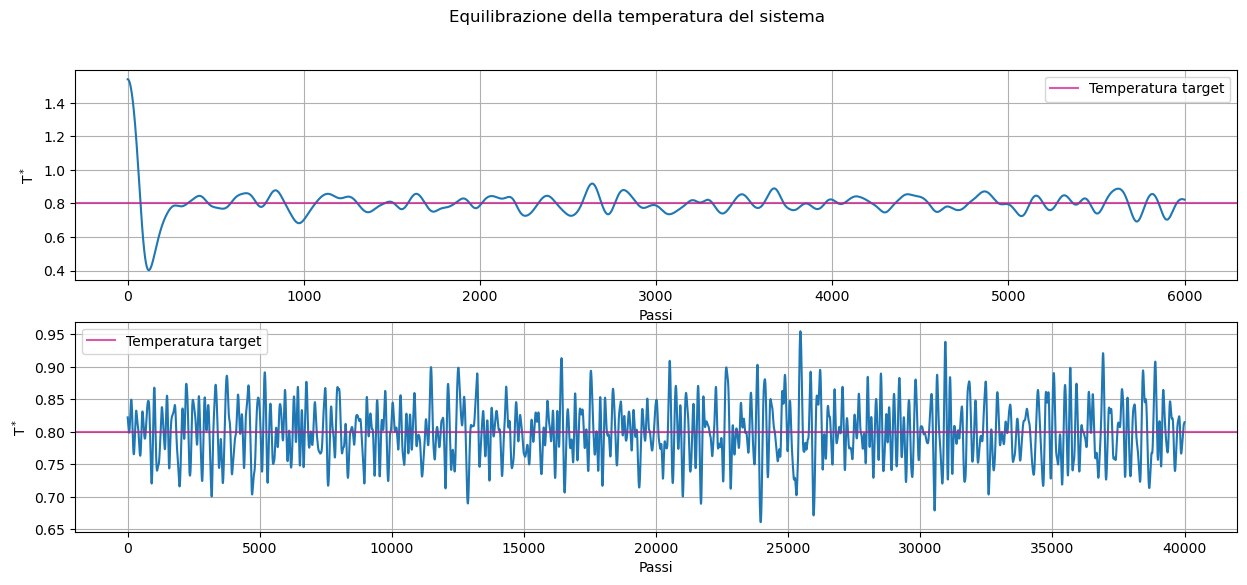

In [2]:
Npar=6000  #passi della simulazione parziale
#plotto T di equilibrazione in base agli steps (non faccio media a blocchi qua)
#faccio +1 perchè indicizza da 0 np.arange
xeqpar=np.arange(Npar)+1  
#valori temperatura istantanea simulazione di equilibrazione
solTeqpar=np.loadtxt("SolidState/eqtemppar.dat", delimiter=" ", usecols=0,  unpack="true")

Ntot=40000  #passi totali della simulazione
#plotto T della simulazione in base agli steps per far vedere equilibrazione avvenuta
#faccio +1 perchè indicizza da 0 np.arange
xeqtot=np.arange(Ntot)+1 
#valori temperatura istantanea simulazione di misura
solTeqtot=np.loadtxt("SolidState/eqtemptot.dat", delimiter=" ", usecols=0,  unpack="true")  

sfig ,(splt1, splt2) = plt.subplots(2, 1, figsize=(15, 6))

splt1.plot(xeqpar, solTeqpar)
splt1.axhline(y=0.8, color="mediumvioletred", label="Temperatura target", alpha=0.7)
splt1.set_xlabel("Passi")
splt1.set_ylabel(r"$\mathrm{T^*}$")
splt1.grid(True)
splt1.legend()

splt2.plot(xeqtot, solTeqtot)
splt2.axhline(y=0.8, color="mediumvioletred", label="Temperatura target", alpha=0.7)
splt2.set_xlabel("Passi")
splt2.set_ylabel(r"$\mathrm{T^*}$")
splt2.grid(True)
splt2.legend()

sfig.suptitle("Equilibrazione della temperatura del sistema")
plt.show()

Per le misure ho fatto evolvere il sistema per $M=4\cdot10^4$ passi, che ho suddiviso in $N=20$ blocchi per calcolare i valori medi con relativi errori delle grandezze considerate. L'elevato numero di passi per ogni blocco si deve all'elevato tempo necessario per liberarsi della correlazione fra le misure, il basso numero di blocchi, di conseguenza, l'ho scelto per avere una statistica soddisfacente senza aumentare troppo il tempo di calcolo richiesto dal programma.

Il valor medio all'ultimo blocco della temperatura risulta compatibile con il valore target entro $1\sigma$, confermando la bontà dell'equilibrazione svolta. Come atteso, l'andamento dell'energia cinetica media per particella segue quello della temperatura del sistema, mentre quello dell'energia potenziale è tale da rendere pressochè costante l'energia totale media per particella.

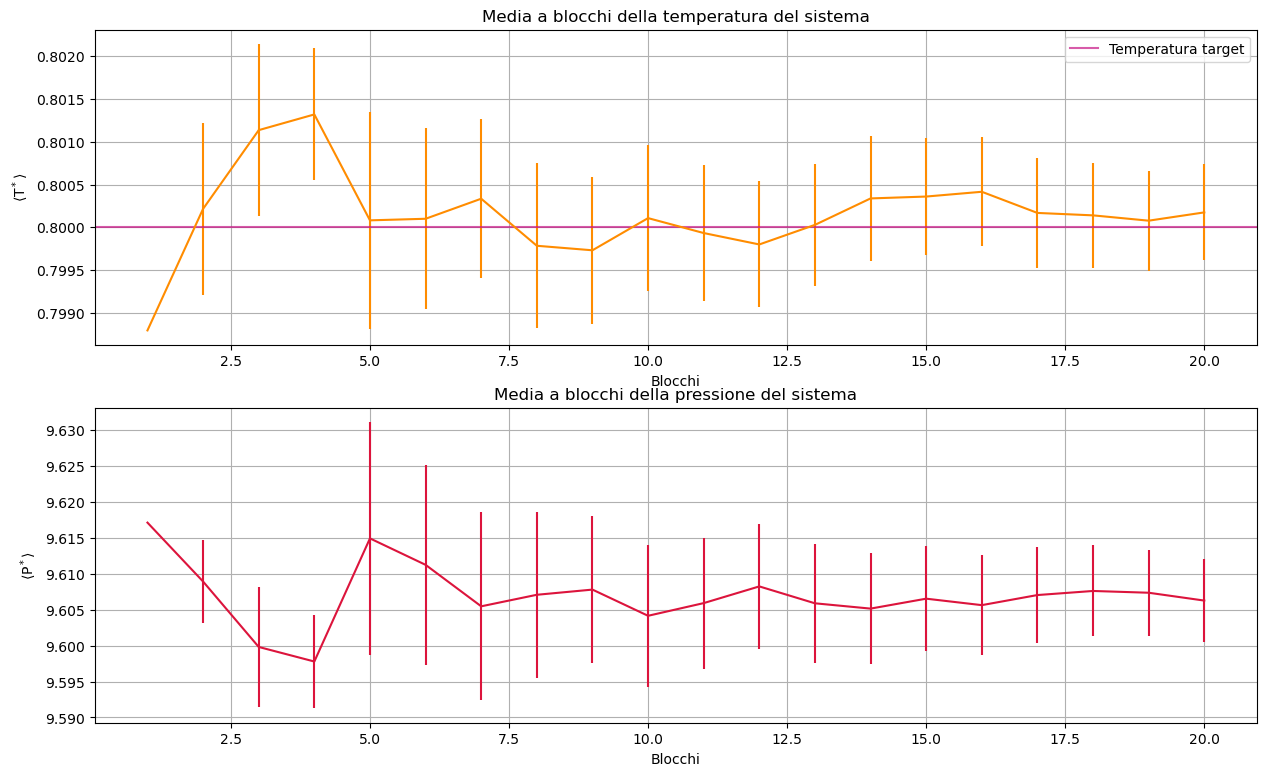

In [3]:
Nblock=20  #numero blocchi simulazione
xblocks=np.arange(Nblock)+1  #sulle ascisse il blocco in esame

#ordinate con errori dei plot
solTemps, solTempErrs=np.loadtxt("SolidState/temperature.dat", usecols=(2, 3),  unpack="true")  
solPress, solPresErrs=np.loadtxt("SolidState/pressure.dat", usecols=(2, 3),  unpack="true")  

sbfig ,(sbplt1, sbplt2) = plt.subplots(2, 1, figsize=(15, 9))

sbplt1.errorbar(xblocks, solTemps, yerr=solTempErrs, color="darkorange")
sbplt1.axhline(y=0.8, color="mediumvioletred", label="Temperatura target", alpha=0.7)
sbplt1.set_xlabel("Blocchi")
sbplt1.set_ylabel(r"$\left<\mathrm{T^*}\right>$")
sbplt1.set_title("Media a blocchi della temperatura del sistema")
sbplt1.legend()
sbplt1.grid(True)

sbplt2.errorbar(xblocks, solPress, yerr=solPresErrs, color="crimson")
sbplt2.set_xlabel("Blocchi")
sbplt2.set_ylabel(r"$\left<\mathrm{P^*}\right>$")
sbplt2.set_title("Media a blocchi della pressione del sistema")
sbplt2.grid(True)

plt.show()

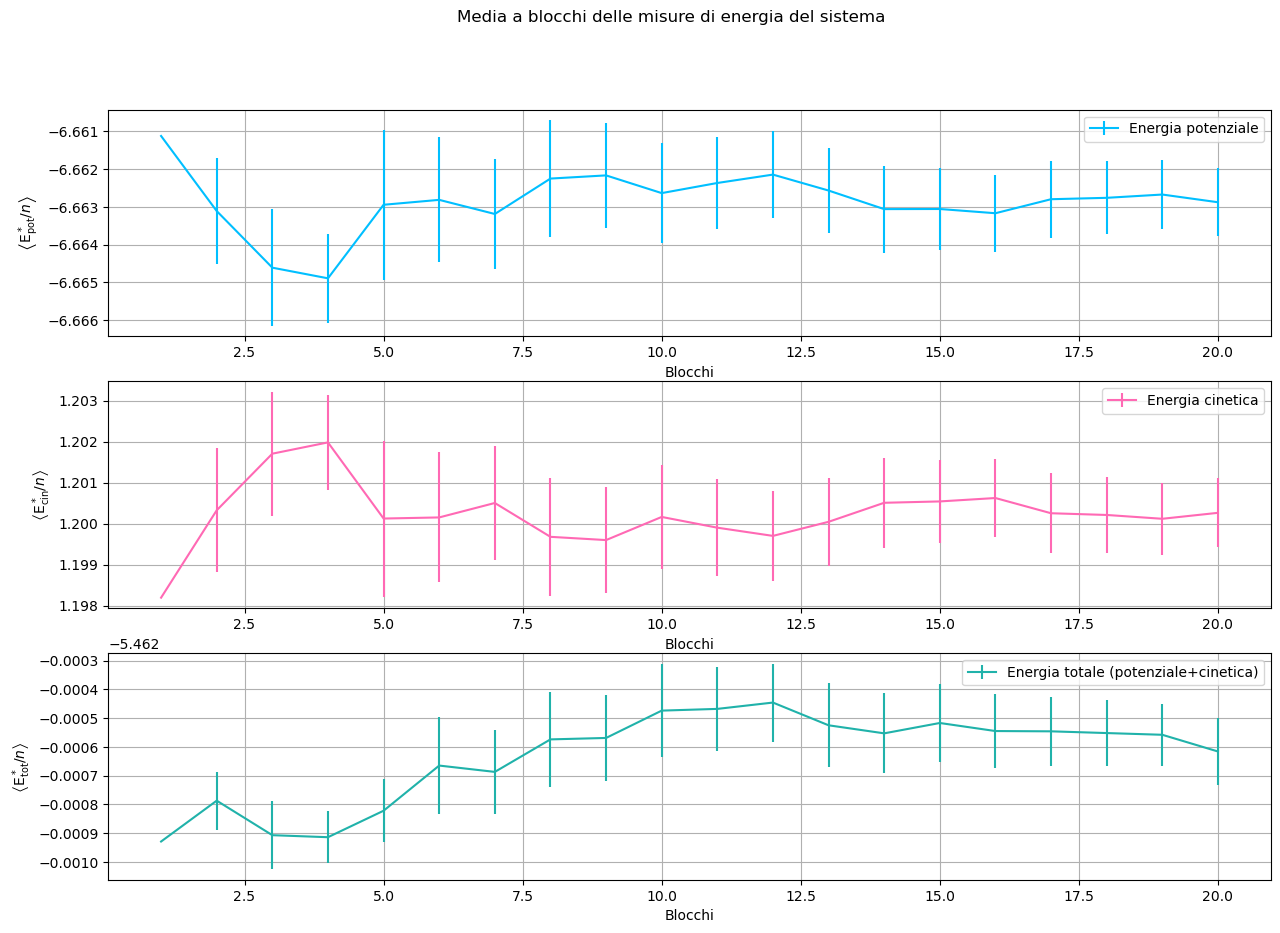

In [4]:
#medie a blocchi con errori delle tre energie
solPens, solPenErrs=np.loadtxt("SolidState/potential_energy.dat", usecols=(2, 3),  unpack="true") 
solKens, solKenErrs=np.loadtxt("SolidState/kinetic_energy.dat", usecols=(2, 3),  unpack="true") 
solTens, solTenErrs=np.loadtxt("SolidState/total_energy.dat", usecols=(2, 3),  unpack="true")  

sefig ,(seplt1, seplt2, seplt3) = plt.subplots(3, 1, figsize=(15, 10))

seplt1.errorbar(xblocks, solPens, yerr=solPenErrs, label="Energia potenziale", color="deepskyblue")
seplt1.set_xlabel("Blocchi")
seplt1.set_ylabel(r"$\left<\mathrm{E_{pot}^*}/\mathrm{N_p}\right>$")
seplt1.legend()
seplt1.grid(True)

seplt2.errorbar(xblocks, solKens, yerr=solKenErrs, label="Energia cinetica", color="hotpink")
seplt2.set_xlabel("Blocchi")
seplt2.set_ylabel(r"$\left<\mathrm{E_{cin}^*}/\mathrm{N_p}\right>$")
seplt2.legend()
seplt2.grid(True)

seplt3.errorbar(xblocks, solTens, yerr=solTenErrs, label="Energia totale (potenziale+cinetica)", color="lightseagreen")
seplt3.set_xlabel("Blocchi")
seplt3.set_ylabel(r"$\left<\mathrm{E_{tot}^*}/\mathrm{N_p}\right>$")
seplt3.legend()
seplt3.grid(True)

sefig.suptitle("Media a blocchi delle misure di energia del sistema")
plt.show()

## Stato liquido

In questo caso, il sistema simulato era caratterizzato da $\rho^*=0.8$, $T^*=1.1$ e $r_c=2.5$. 

Ho eseguito l'equilibrazione come nel caso precedente, aspettandomi anche qua un iniziale calo della temperatura e dunque partendo da un valore più alto del target. Poichè la fase liquida non corrisponde ad  una configurazione del sistema ordinata quanto quella assunta allo stato solido, dopo la brusca decrescita iniziale $T$ si stabilizza su un valore senza la considerevole crescita notata per il sistema solido.

Raggiunta una condizione connsiderata equilibrata, ho fatto ripartire il programma dalla configurazione raggiunta per effettuare le misure. Anche qua, questa seconda fase è durata $M=4\cdot10^4$ passi suddivisi in $N=20$ blocchi.

La temperatura media all'ultimo blocco risulta in ottimo accordo con quella desiderata, dunque l'equilibrazione è da considerarsi ben riuscita. Gli andamenti dei valori medi di energia per particella sono nuovamente in accordo con le previsioni e tali da rendere sostanzialmente costante l'energia totale media per particella durante l'intera durata della simulazione.

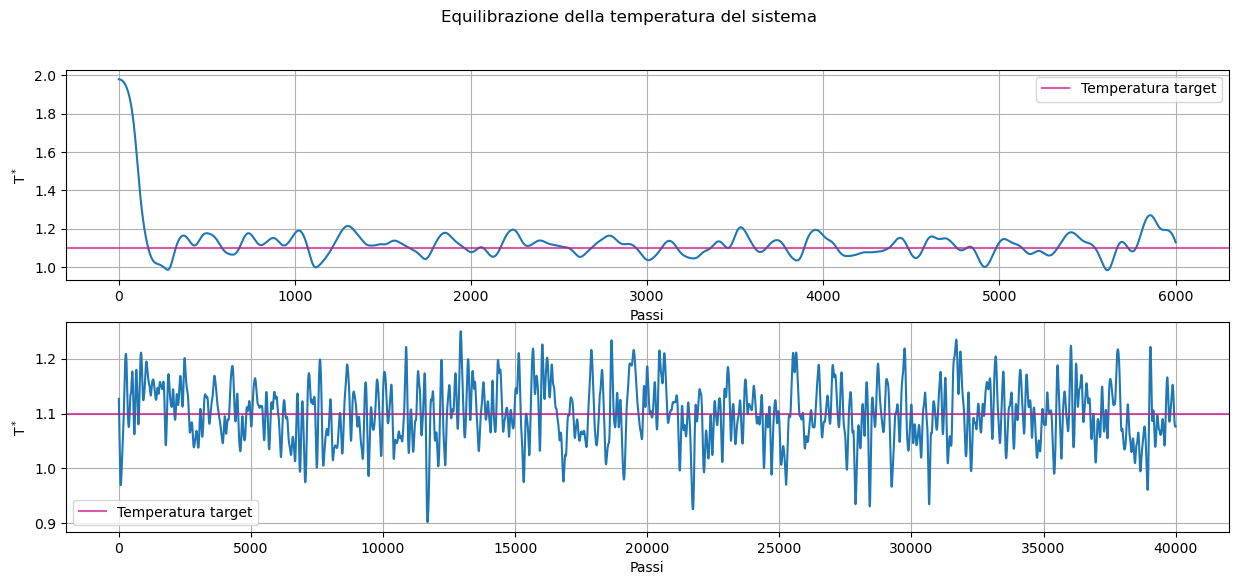

In [5]:
#T istantanea equilibrazione
liqTeqpar=np.loadtxt("LiquidState/eqtemppar.dat", delimiter=" ", usecols=0,  unpack="true")  
#T istantanea simulazione
liqTeqtot=np.loadtxt("LiquidState/eqtemptot.dat", delimiter=" ", usecols=0,  unpack="true")  

lfig ,(lplt1, lplt2) = plt.subplots(2, 1, figsize=(15, 6))

lplt1.plot(xeqpar, liqTeqpar)
lplt1.axhline(y=1.1, color="mediumvioletred", label="Temperatura target", alpha=0.7)
lplt1.set_xlabel("Passi")
lplt1.set_ylabel(r"$\mathrm{T^*}$")
lplt1.grid(True)
lplt1.legend()

lplt2.plot(xeqtot, liqTeqtot)
lplt2.axhline(y=1.1, color="mediumvioletred", label="Temperatura target", alpha=0.7)
lplt2.set_xlabel("Passi")
lplt2.set_ylabel(r"$\mathrm{T^*}$")
lplt2.grid(True)
lplt2.legend()

lfig.suptitle("Equilibrazione della temperatura del sistema")
plt.show()

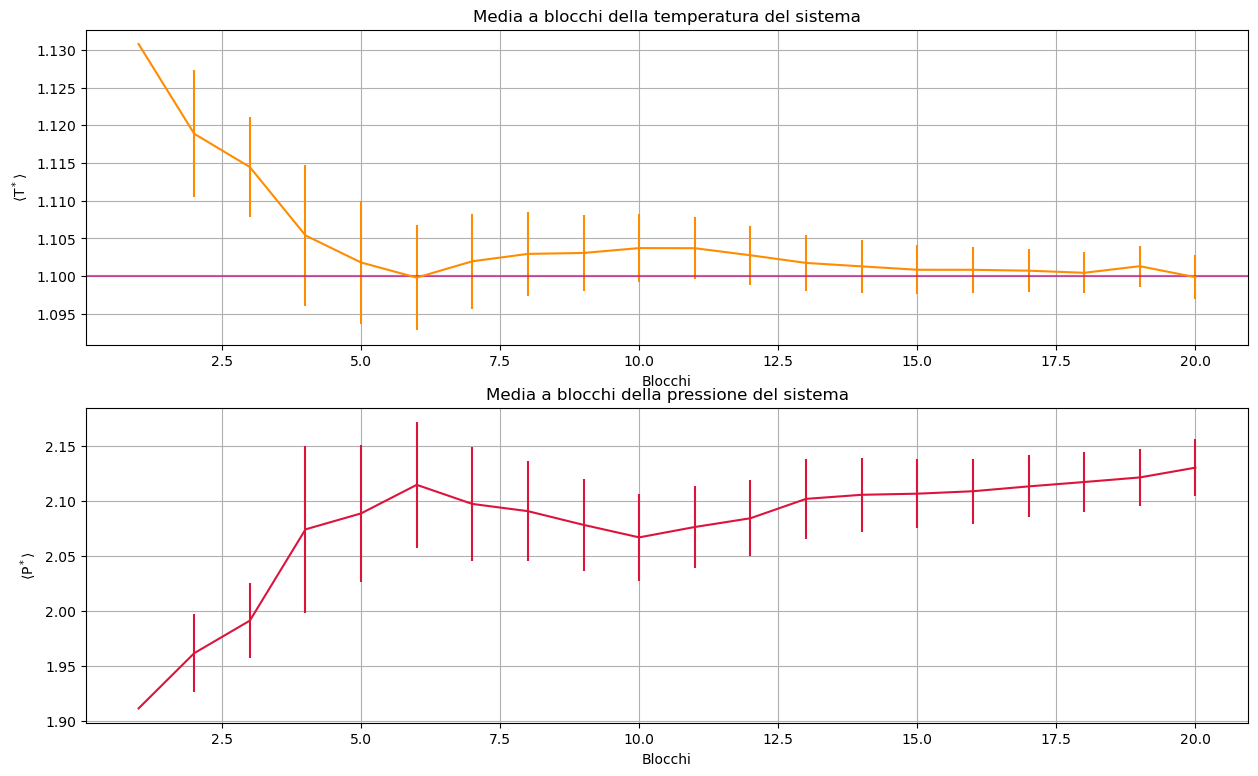

In [6]:
#medie a blocchi con errori di T e P
liqTemps, liqTempErrs=np.loadtxt("LiquidState/temperature.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
liqPress, liqPresErrs=np.loadtxt("LiquidState/pressure.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

lbfig ,(lbplt1, lbplt2) = plt.subplots(2, 1, figsize=(15, 9))

lbplt1.errorbar(xblocks, liqTemps, yerr=liqTempErrs, color="darkorange")
lbplt1.axhline(y=1.1, color="mediumvioletred", label="Temperatura target", alpha=0.7)
lbplt1.set_xlabel("Blocchi")
lbplt1.set_ylabel(r"$\left<\mathrm{T^*}\right>$")
lbplt1.set_title("Media a blocchi della temperatura del sistema")
lbplt1.grid(True)

lbplt2.errorbar(xblocks, liqPress, yerr=liqPresErrs, color="crimson")
lbplt2.set_xlabel("Blocchi")
lbplt2.set_ylabel(r"$\left<\mathrm{P^*}\right>$")
lbplt2.set_title("Media a blocchi della pressione del sistema")
lbplt2.grid(True)

plt.show()

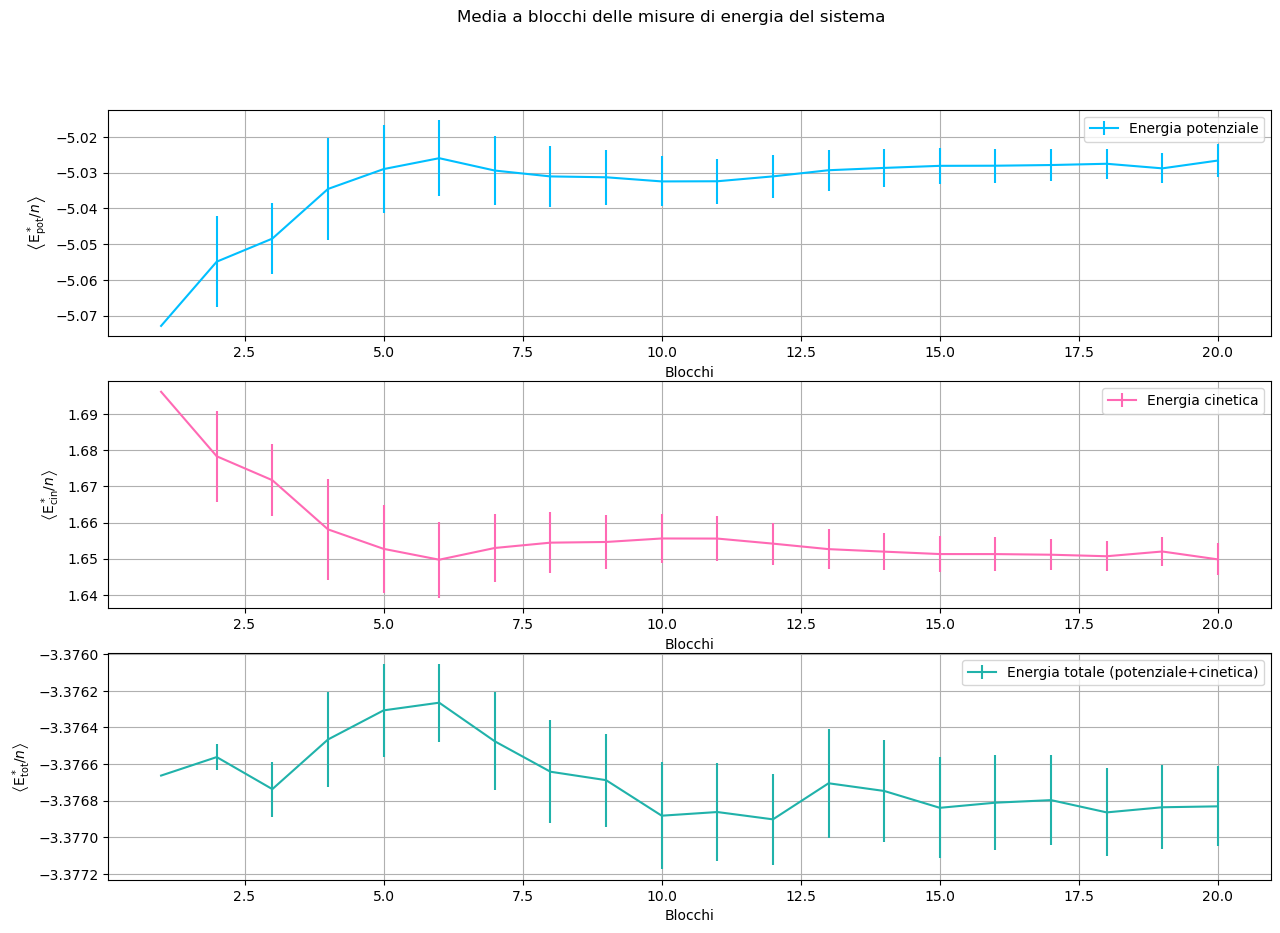

In [7]:
#medie a blocchi con errori delle energie
liqPens, liqPenErrs=np.loadtxt("LiquidState/potential_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
liqKens, liqKenErrs=np.loadtxt("LiquidState/kinetic_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
liqTens, liqTenErrs=np.loadtxt("LiquidState/total_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

lefig ,(leplt1, leplt2, leplt3) = plt.subplots(3, 1, figsize=(15, 10))

leplt1.errorbar(xblocks, liqPens, yerr=liqPenErrs, label="Energia potenziale", color="deepskyblue")
leplt1.set_xlabel("Blocchi")
leplt1.set_ylabel(r"$\left<\mathrm{E_{pot}^*}/\mathrm{N_p}\right>$")
leplt1.legend()
leplt1.grid(True)

leplt2.errorbar(xblocks, liqKens, yerr=liqKenErrs, label="Energia cinetica", color="hotpink")
leplt2.set_xlabel("Blocchi")
leplt2.set_ylabel(r"$\left<\mathrm{E_{cin}^*}/\mathrm{N_p}\right>$")
leplt2.legend()
leplt2.grid(True)

leplt3.errorbar(xblocks, liqTens, yerr=liqTenErrs, label="Energia totale (potenziale+cinetica)", color="lightseagreen")
leplt3.set_xlabel("Blocchi")
leplt3.set_ylabel(r"$\left<\mathrm{E_{tot}^*}/\mathrm{N_p}\right>$")
leplt3.legend()
leplt3.grid(True)

lefig.suptitle("Media a blocchi delle misure di energia del sistema")
plt.show()

## Stato gassoso

Il sistema doveva essere misurato nella configurazione $\rho^*=0.05$, $T^*=1.2$ e $r_c=5.0$. Questa corrisponde ad un punto critico dello spazio delle fasi, in cui il sistema in fase gassosa tende facilmente a ricadere in fase liquida. Per questo motivo, il tempo di equilibrazione necessario è maggiore rispetto ai casi precedenti. Inoltre, poichè nella fase gassosa le particelle sono più libere di muoversi, appena il sistema esce dalla fase cristallina queste raggiungono distanze reciproche tali da interagire molto poco. Di conseguenza, durante i primi passi dell'equilibrazione, l'energia totale è mantenuta costante grazie ad un aumento di emergia cinetica e temperatura. Questo spiegherebbe perchè ho dovuto scegliere una temperatura iniziale maggiore di quella target. L'analisi a blocchi effettuata in seguito, invece, è stata eseguita come per lo stato solido e liquido.

La temperatura media all'ultimo blocco è compatibile con il valore deisderato entro $1\sigma$ dunque, nonostante l'andamento istantaneo non raggiunga una stabilità buona quanto le precedenti, l'equilibrazione è riuscita. Anche i valori di energia media per particella risultano in accordo con i comportamenti attesi.

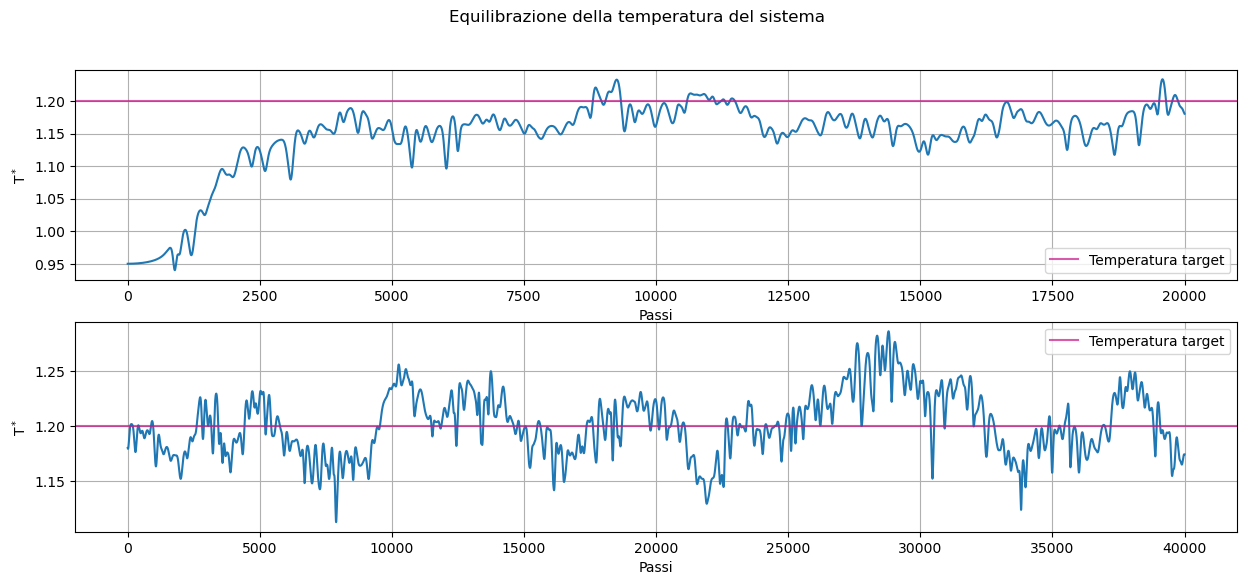

In [8]:
#numero passi simulazioni e vettori di ascissa per i plot istantanei
Gpar=20000
Gtot=40000
xgpar=np.arange(Gpar)+1
xgtot=np.arange(Gtot)+1

#T istantanee di equilibrazione e di simulazione
gasTeqpar=np.loadtxt("GasState/eqtemppar.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
gasTeqtot=np.loadtxt("GasState/eqtemptot.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati

gfig ,(gplt1, gplt2) = plt.subplots(2, 1, figsize=(15, 6))

gplt1.plot(xgpar, gasTeqpar)
gplt1.axhline(y=1.2, color="mediumvioletred", label="Temperatura target", alpha=0.7)
gplt1.set_xlabel("Passi")
gplt1.set_ylabel(r"$\mathrm{T^*}$")
gplt1.grid(True)
gplt1.legend()

gplt2.plot(xgtot, gasTeqtot)
gplt2.axhline(y=1.2, color="mediumvioletred", label="Temperatura target", alpha=0.7)
gplt2.set_xlabel("Passi")
gplt2.set_ylabel(r"$\mathrm{T^*}$")
gplt2.grid(True)
gplt2.legend()

gfig.suptitle("Equilibrazione della temperatura del sistema")
plt.show()

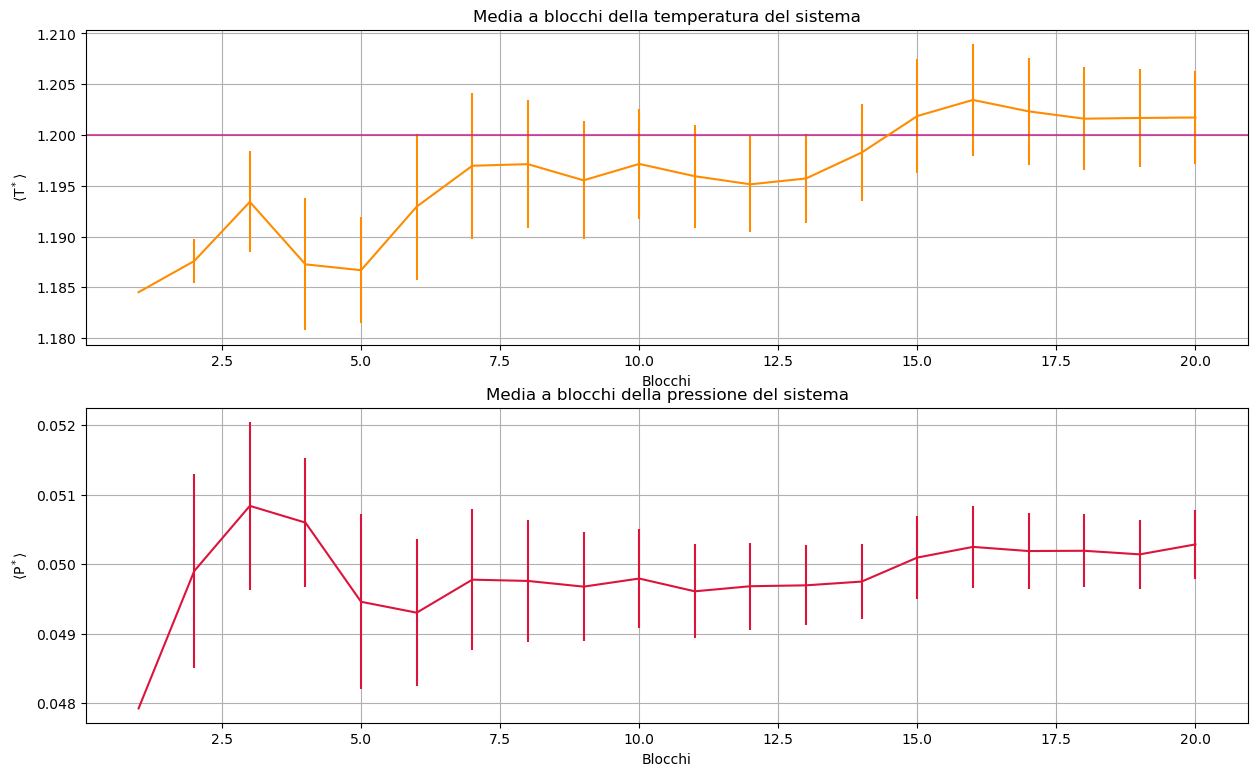

In [9]:
#medie con errori di T e P
gasTemps, gasTempErrs=np.loadtxt("GasState/temperature.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
gasPress, gasPresErrs=np.loadtxt("GasState/pressure.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

gbfig ,(gbplt1, gbplt2) = plt.subplots(2, 1, figsize=(15, 9))

gbplt1.errorbar(xblocks, gasTemps, yerr=gasTempErrs, color="darkorange")
gbplt1.axhline(y=1.2, color="mediumvioletred", label="Temperatura target", alpha=0.7)
gbplt1.set_xlabel("Blocchi")
gbplt1.set_ylabel(r"$\left<\mathrm{T^*}\right>$")
gbplt1.set_title("Media a blocchi della temperatura del sistema")
gbplt1.grid(True)

gbplt2.errorbar(xblocks, gasPress, yerr=gasPresErrs, color="crimson")
gbplt2.set_xlabel("Blocchi")
gbplt2.set_ylabel(r"$\left<\mathrm{P^*}\right>$")
gbplt2.set_title("Media a blocchi della pressione del sistema")
gbplt2.grid(True)

plt.show()

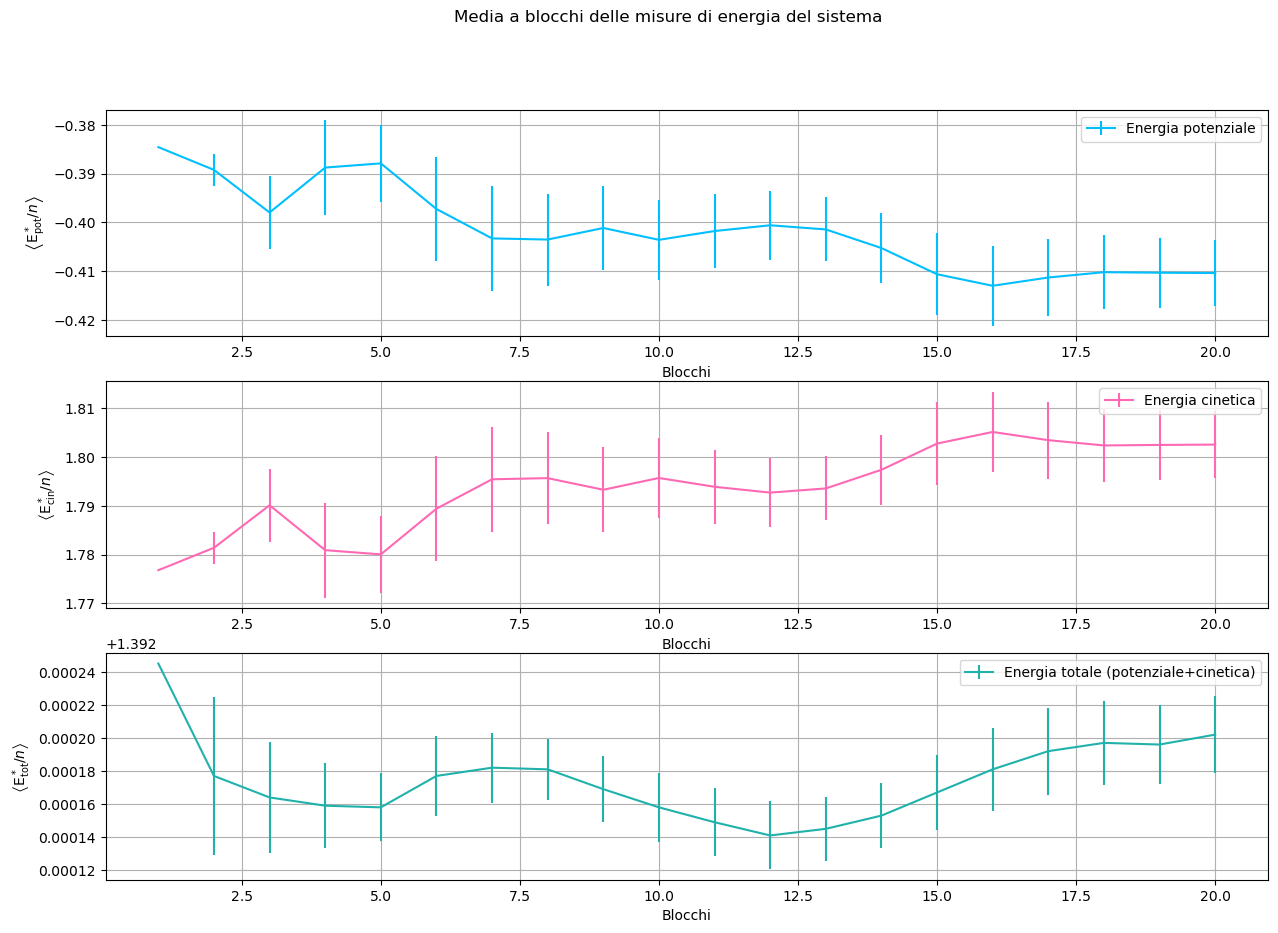

In [10]:
#medie con errori delle energie
gasPens, gasPenErrs=np.loadtxt("GasState/potential_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
gasKens, gasKenErrs=np.loadtxt("GasState/kinetic_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati
gasTens, gasTenErrs=np.loadtxt("GasState/total_energy.dat", usecols=(2, 3),  unpack="true")  #vettore delle ordinate dei punti plottati

gefig ,(geplt1, geplt2, geplt3) = plt.subplots(3, 1, figsize=(15, 10))

geplt1.errorbar(xblocks, gasPens, yerr=gasPenErrs, label="Energia potenziale", color="deepskyblue")
geplt1.set_xlabel("Blocchi")
geplt1.set_ylabel(r"$\left<\mathrm{E_{pot}^*}/\mathrm{N_p}\right>$")
geplt1.legend()
geplt1.grid(True)

geplt2.errorbar(xblocks, gasKens, yerr=gasKenErrs, label="Energia cinetica", color="hotpink")
geplt2.set_xlabel("Blocchi")
geplt2.set_ylabel(r"$\left<\mathrm{E_{cin}^*}/\mathrm{N_p}\right>$")
geplt2.legend()
geplt2.grid(True)

geplt3.errorbar(xblocks, gasTens, yerr=gasTenErrs, label="Energia totale (potenziale+cinetica)", color="lightseagreen")
geplt3.set_xlabel("Blocchi")
geplt3.set_ylabel(r"$\left<\mathrm{E_{tot}^*}/\mathrm{N_p}\right>$")
geplt3.legend()
geplt3.grid(True)

gefig.suptitle("Media a blocchi delle misure di energia del sistema")
plt.show()